<a href="https://colab.research.google.com/github/MarceloMendes94/Machine_Learning_IFES/blob/main/Trabalho1_SVM_Classifier_Marcelo_Passamai_Mendes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM Classifier

https://www.youtube.com/watch?v=efR1C6CvhmE

https://towardsdatascience.com/support-vector-machines-svm-c9ef22815589

https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47

https://towardsdatascience.com/a-guide-to-svm-parameter-tuning-8bfe6b8a452c

https://towardsdatascience.com/understanding-support-vector-machine-part-2-kernel-trick-mercers-theorem-e1e6848c6c4d

https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/


Métricas

https://en.wikipedia.org/wiki/Precision_and_recall

Pipeline

https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf

https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976

https://www.kaggle.com/baghern/a-deep-dive-into-sklearn-pipelines


## Exercício:

Implemente o Classificador SVM usando os Kernels Linear e RBF. Utilize como ponto de partida este Notebook em anexo.

E seguida, usando validação cruzada K-fold (K=5), ajuste os parâmetros (usando GridSearchCV) para ambos os classificadores (Linear e RBF), parâmetro de regularização C, e  γ  (gamma, somente RBF) e informe qual a melhor configuração para obter melhor (i) Acurácia, (ii) Precision, (iii) Recall e (iv) F1. Utilize pipelines para resolver esta atividade.

    Você pode encontrar informações sobre as métricas nos links abaixo:
    https://en.wikipedia.org/wiki/Precision_and_recall

=============================================

Em detalhes, você deve fazer o seguinte (os itens 1 e 2 tem apenas caráter didático):

1) Padronização dos dados de entrada (média 0 e desvio-padrão 1); Dica: lembra do StandarScaler?  
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

2) Validação Cruzada usando o GridSearchCV (avaliando o grid de Parâmetros) usando diferente métricas: (i) Acurácia, (ii) Precision, (iii) Recall e (iv) F1. Dica: checar o parâmetro 'scoring'.

        GridSearchCV
        https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

        Lista de valores string do parâmetro 'scoring' que você pode utilizar: 
        https://scikit-learn.org/stable/modules/model_evaluation.html

3) Pipeline: agora refaça os itens acima mas usando Pipeline. Você deve criar *dois pipelines* -- um para o kernel 'linear' (pipe_svc_linear) e outro para o kernel 'rbf' (pipe_svc_rbf) -- ambos de dois passos:

    (i) 'scaler': escale/padronize os dados (média=0, desv.pad=1);
    (ii) 'svm_linear' ou 'svm_rbf', respectivamente para cada kernel: LINEAR ou RBF.
        https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
        https://medium.com/data-hackers/como-usar-pipelines-no-scikit-learn-1398a4cc6ae9

4) Por fim, agora faça a validação cruzada (da mesma forma feita no item 2) em ambos os pipelines.

Obs: Esta atividade foi dividida em itens 1-4 apenas pra ficar didática. Os itens que realmente importam são os 3 e 4, pois contemplam os itens 1 e 2.

Bom trabalho! :)


### Importing Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import scikit-learn dataset library
from sklearn import datasets

# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import svm model
from sklearn import svm
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

### Loading Data

In [3]:
#Load dataset
cancer = datasets.load_breast_cancer()

### Exploring Data

After you have loaded the dataset, you might want to know a little bit more about it. You can check feature and target names.



In [4]:
# FEATURES
df_cancer = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

# CLASS / TARGET (0:Malign, 1:Benign)
df_cancer['CLASS'] = cancer.target

# print the cancer data features/target (top 5 records)
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,CLASS
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
# print data(feature)shape
df_cancer.shape

(569, 31)

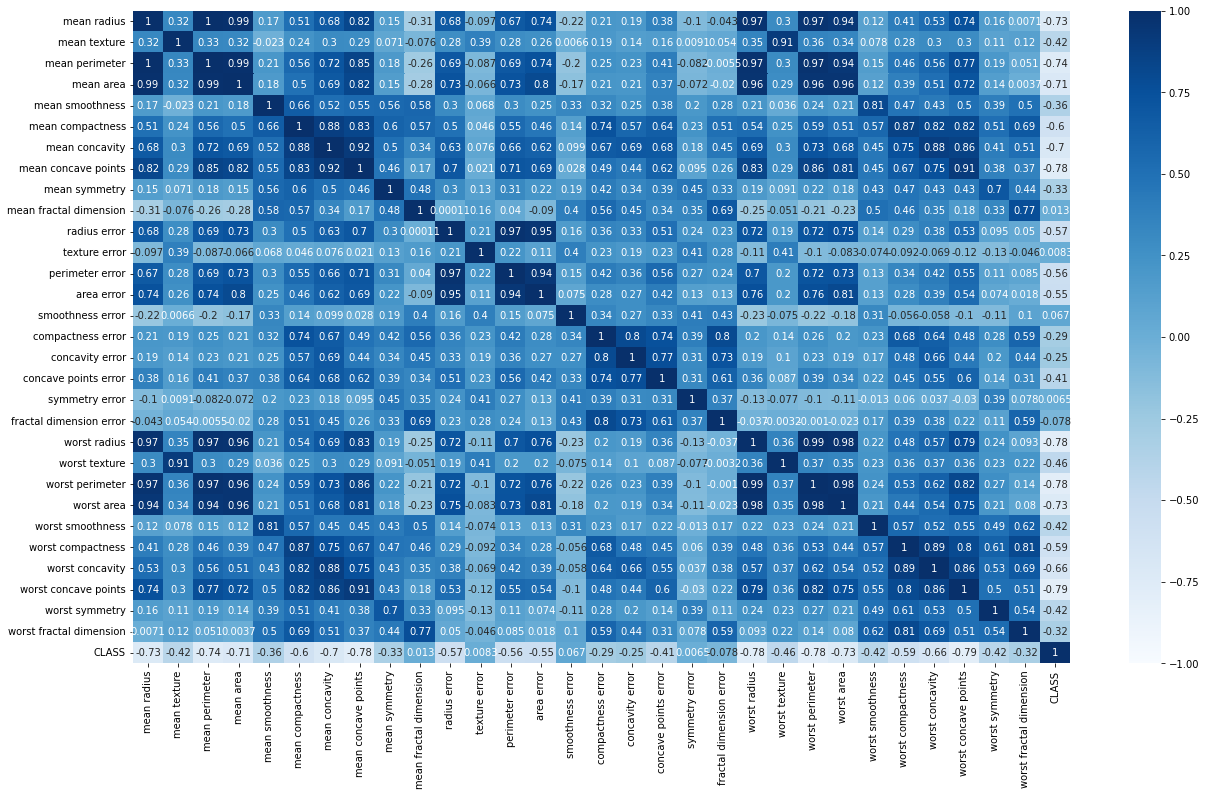

In [6]:
f, ax = plt.subplots(figsize=(21, 12))
#sns.heatmap(df, annot=True, fmt=".3f", linewidths=.5, ax=ax);
sns.heatmap(df_cancer.corr(),annot=True,  vmin=-1, vmax=1, cmap="Blues");

Verificando a disperção dos dados.



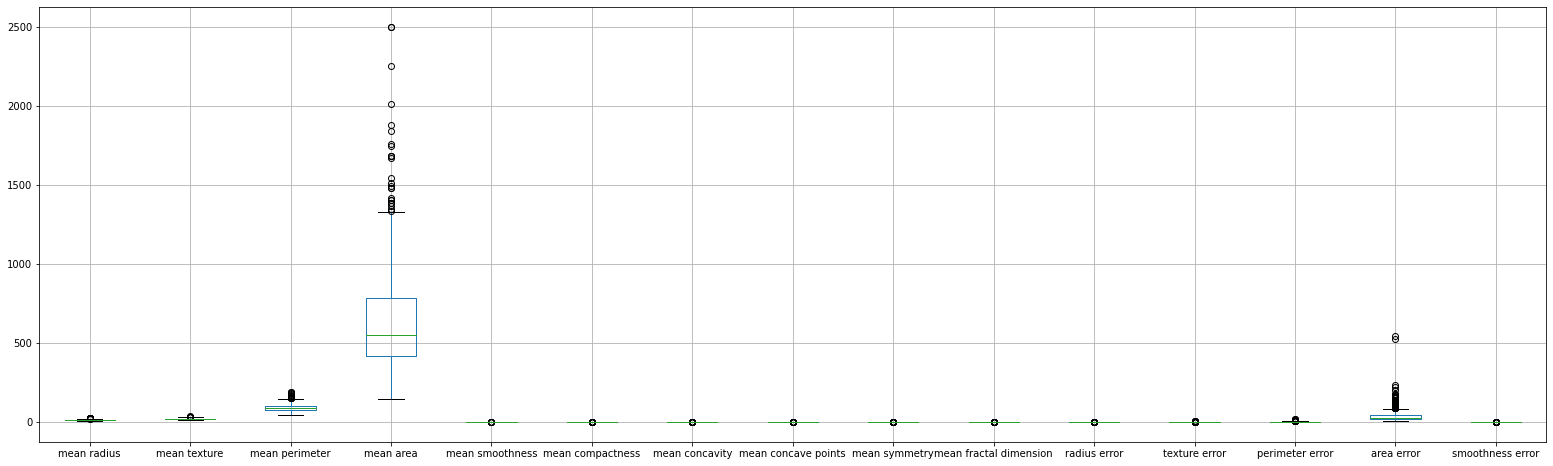

In [ ]:
df_cancer[df_cancer.columns[:15]].boxplot(figsize=(27, 8))

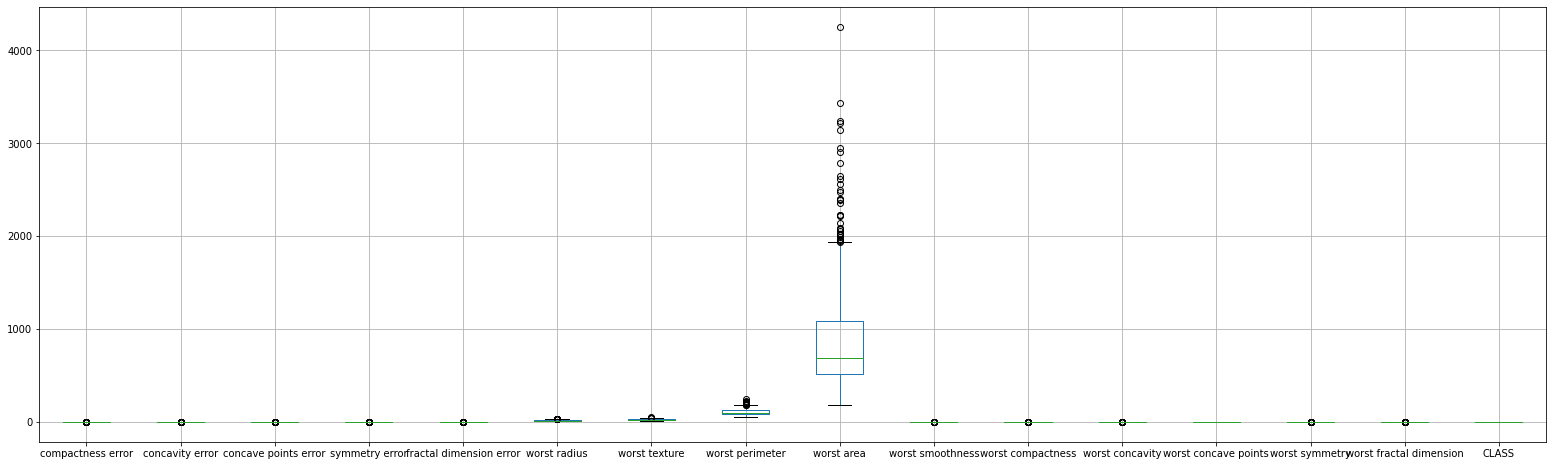

In [7]:
df_cancer[df_cancer.columns[15:]].boxplot(figsize=(27, 8))

### Splitting Data

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Split the dataset by using the function train_test_split(). you need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [8]:
X = df_cancer.drop(['CLASS'], axis=1)
y = df_cancer['CLASS']

# Split dataset into training set and test set 
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Generating Model

Let's build support vector machine model.

First, import the SVM module and create support vector classifier object by passing argument kernel as the linear kernel in `SVC()` function.

Then, fit your model on train set using `fit()` and perform prediction on the test set using predict().

In [9]:
# Padronizar/ Normalizar / Escalar os dados
from sklearn.preprocessing import StandardScaler

df_cpy = df_cancer.drop("CLASS",axis=1)

scaler = StandardScaler(copy=False)
scaler.fit(df_cpy)
scaler.transform(df_cpy)
df_cpy.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


Mostrando os dados na mesma escala

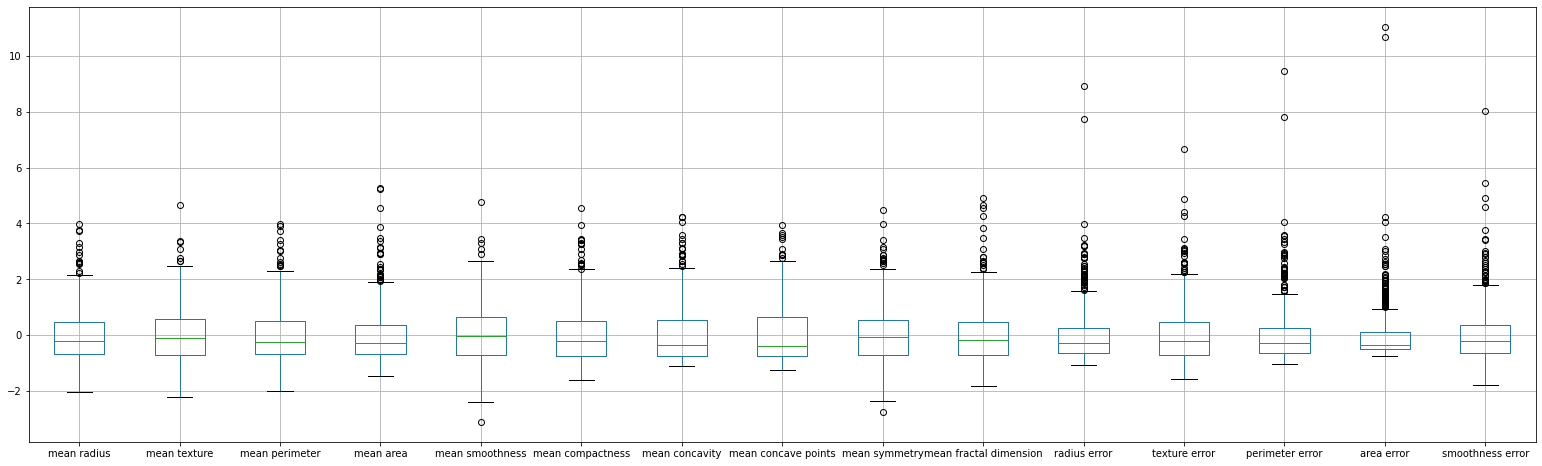

In [10]:
df_cpy[df_cpy.columns[:15]].boxplot(figsize=(27, 8))

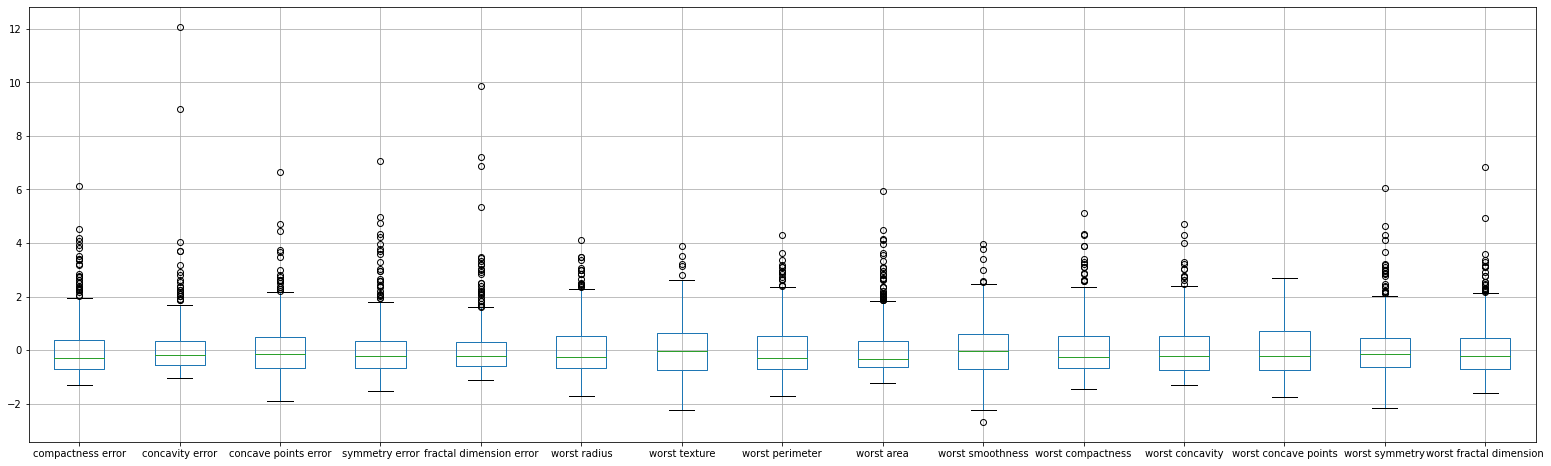

In [11]:
df_cpy[df_cpy.columns[15:]].boxplot(figsize=(27, 8))

In [12]:
#Create a svm Classifier
clf_svm = svm.SVC(kernel='linear') # Linear Kernel

In [13]:
# redividindo os dados
X = df_cpy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
#Train the model using the training sets
clf_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [15]:
#Predict the response for test dataset
y_pred = clf_svm.predict(X_test)

### Evaluating the Model

Let's estimate how accurately the classifier or model can predict the breast cancer of patients.

Accuracy can be computed by comparing actual test set values and predicted values.

In [16]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9766081871345029


For further evaluation, we can also check **precision** and **recall** of model.



In [17]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

# CALCULAR A MEDIDA F1
from sklearn.metrics import f1_score
print("F1 micro:",metrics.f1_score(y_test, y_pred, average='micro'))
print("F1 macro:",metrics.f1_score(y_test, y_pred, average='macro'))

Precision: 0.9814814814814815
Recall: 0.9814814814814815
F1 micro: 0.9766081871345029
F1 macro: 0.9748677248677249


### Testing another (RBF) Kernel

In [18]:
#Create a svm Classifier
clf_svm = svm.SVC(kernel='rbf')

#Train the model using the training sets
clf_svm.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf_svm.predict(X_test)

In [19]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.9707602339181286
Precision: 0.9813084112149533
Recall: 0.9722222222222222


### CROSS-VALIDATION

Performing cross validation to find the best hyperparameters(C, $\gamma$ (gamma)), kernels & finding accuracy on training data:

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
import time

In [22]:
clf_svm = svm.SVC()
param_grid = [{'kernel':['linear'],
                    'C':[0.001, 0.1, 1, 10, 100]},
              {'kernel':['rbf'],
                    'C': [0.001, 0.1, 1, 10, 100],
                    'gamma': [0.5, 5, 10, 50, 100]}]

In [23]:
# Se quiser utilizar outros scores:
# https://scikit-learn.org/stable/modules/model_evaluation.html

## Scoring

### Scoring RECAL

In [26]:
# REPITAM O PROCESSO PARA RECALL PRECISION E F1
start = time.time()

gsvm_recal = GridSearchCV(clf_svm, param_grid, cv=5, n_jobs=None, verbose=8, scoring='recall')
gsvm_recal.fit(X_train,y_train);

end = time.time()
print("Time required: %.3f(s)" % (end-start))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ............C=0.001, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END ............C=0.001, kernel=linear;, score=0.980 total time=   0.0s
[CV 3/5] END ............C=0.001, kernel=linear;, score=0.980 total time=   0.0s
[CV 4/5] END ............C=0.001, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END ............C=0.001, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.980 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.959 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.980 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear

In [27]:
print("Best HyperParameter: ", gsvm_recal.best_params_)
print("Best REACAL: %.2f%%" % (gsvm_recal.best_score_*100))

Best HyperParameter:  {'C': 0.001, 'gamma': 0.5, 'kernel': 'rbf'}
Best REACAL: 100.00%


### Scoring F1

In [28]:
start = time.time()

gsvm_f1 = GridSearchCV(clf_svm, param_grid, cv=5, n_jobs=None, verbose=8, scoring='f1')
gsvm_f1.fit(X_train,y_train);

end = time.time()
print("Time required: %.3f(s)" % (end-start))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ............C=0.001, kernel=linear;, score=0.943 total time=   0.0s
[CV 2/5] END ............C=0.001, kernel=linear;, score=0.961 total time=   0.0s
[CV 3/5] END ............C=0.001, kernel=linear;, score=0.951 total time=   0.0s
[CV 4/5] END ............C=0.001, kernel=linear;, score=0.943 total time=   0.0s
[CV 5/5] END ............C=0.001, kernel=linear;, score=0.925 total time=   0.0s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.980 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.980 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.990 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.971 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.969 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.980 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear

In [29]:
print("Best HyperParameter: ", gsvm_f1.best_params_)
print("Best f1: %.2f%%" % (gsvm_f1.best_score_*100))

Best HyperParameter:  {'C': 1, 'kernel': 'linear'}
Best f1: 98.02%


### Scoring Accuracy

In [30]:
start = time.time()
# Se tiver dúvidas sobre os scorings
#import sklearn
#print(sklearn.metrics.SCORERS.keys())

gsvm_acc = GridSearchCV(clf_svm, param_grid, cv=5, n_jobs=None, verbose=8, scoring='accuracy')
gsvm_acc.fit(X_train,y_train);

end = time.time()
print("Time required: %.3f(s)" % (end-start))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ............C=0.001, kernel=linear;, score=0.925 total time=   0.0s
[CV 2/5] END ............C=0.001, kernel=linear;, score=0.950 total time=   0.0s
[CV 3/5] END ............C=0.001, kernel=linear;, score=0.938 total time=   0.0s
[CV 4/5] END ............C=0.001, kernel=linear;, score=0.924 total time=   0.0s
[CV 5/5] END ............C=0.001, kernel=linear;, score=0.899 total time=   0.0s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.975 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.975 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.988 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.962 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.962 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.975 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear

In [31]:
print("Best HyperParameter: ", gsvm_acc.best_params_)
print("Best Accuracy: %.2f%%" % (gsvm_acc.best_score_*100))

Best HyperParameter:  {'C': 1, 'kernel': 'linear'}
Best Accuracy: 97.48%


### Todos so scores

In [32]:

print("Best HyperParameter: ", gsvm_recal.best_params_)
print("Best REACAL: %.2f%%" % (gsvm_recal.best_score_*100))

print("Best HyperParameter: ", gsvm_f1.best_params_)
print("Best f1: %.2f%%" % (gsvm_f1.best_score_*100))

print("Best HyperParameter: ", gsvm_acc.best_params_)
print("Best Accuracy: %.2f%%" % (gsvm_acc.best_score_*100))

Best HyperParameter:  {'C': 0.001, 'gamma': 0.5, 'kernel': 'rbf'}
Best REACAL: 100.00%
Best HyperParameter:  {'C': 1, 'kernel': 'linear'}
Best f1: 98.02%
Best HyperParameter:  {'C': 1, 'kernel': 'linear'}
Best Accuracy: 97.48%


Appying model on testing data and finding accuracy on it.


In [33]:
gsvm_f1.best_estimator_

SVC(C=1, kernel='linear')

In [34]:
clf_svm_best = gsvm_f1.best_estimator_

clf_svm_best.fit(X_train, y_train)

y_pred = clf_svm_best.predict(X_test)

In [35]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:   ", metrics.recall_score(y_test, y_pred))
# Confusion Matrix
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))

Accuracy:  0.9766081871345029
Precision: 0.9814814814814815
Recall:    0.9814814814814815
Confusion Matrix:
 [[ 61   2]
 [  2 106]]


In [36]:
? metrics.confusion_matrix

## PIPELINES

In [ ]:
# FAZER USANDO PIPELINES

In [37]:
# rbf
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold 

X_train, X_teste , y_train, y_test = train_test_split(X,y,train_size=0.7)

pipe_svc_rbf = Pipeline([
                 ('scaler', StandardScaler()),
                 ('svc', SVC(
                     kernel='rbf',
                     C=0.001,
                     gamma= 0.5)
                 ) ])

In [38]:
pipe_svc_rbf.fit(X_train,y_train)

kfold  = KFold(n_splits=5, shuffle=True) # shuffle=True, Shuffle (embaralhar) the data.
result = cross_val_score(pipe_svc_rbf, X, y, cv = kfold, scoring='recall' )
print(result)

[1. 1. 1. 1. 1.]


In [39]:
#Linear
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold 

X_train, X_teste , y_train, y_test = train_test_split(X,y,train_size=0.7)

pipe_svc_linear = Pipeline([
                 ('scaler', StandardScaler()),
                 ('svc', SVC(
                     kernel='linear',
                     C=1)
                 ) ])

In [40]:
pipe_svc_linear.fit(X_train,y_train)

kfold  = KFold(n_splits=5, shuffle=True) # shuffle=True, Shuffle (embaralhar) the data.
result = cross_val_score(pipe_svc_linear, X, y, cv = kfold, scoring='f1' )
print(result)

[0.97902098 0.98611111 0.96350365 0.99354839 0.97183099]
